In [156]:
import pickle
from analysing_xi_2 import *
import matplotlib.pyplot as plt
import numpy as np
path_to_pickles = "/space/ge65kox/BA/pickles/analysing_xi_max/"


In [157]:
pickle_objs = pickle.load(open(path_to_pickles + "xi_analysis_N_15_x_7.pkl", "rb"))

In [158]:
xi_mpo = [pickle_objs[i].xi_mpo for i in range(len(pickle_objs))]
xi_mps = [pickle_objs[i].xi_mps for i in range(len(pickle_objs))]
p_success_mpo = [pickle_objs[i].p_success_mpo for i in range(len(pickle_objs))]
N=pickle_objs[0].N
x=pickle_objs[0].x


p_success_regular = p_success_mpo[0]
p_success_mpo = np.array(p_success_mpo[1:])/p_success_regular
xi_mpo = np.array(xi_mpo[1:])
xi_mps = np.array(xi_mps[1:])

shape = (np.max(xi_mps)-np.min(xi_mps)+1,np.max(xi_mpo)-np.min(xi_mpo)+1)
p_success_mpo = np.flip(np.reshape(p_success_mpo, shape).T)
xi_mpo = np.flip(np.reshape(xi_mpo, shape).T)
xi_mps = np.flip(np.reshape(xi_mps, shape).T)

print(xi_mps.shape)
print(xi_mpo.shape)
ez = 19
p_success_mpo_extra_zeros = np.concatenate((np.zeros((ez, p_success_mpo.shape[1])),p_success_mpo),axis=0)
print(p_success_mpo_extra_zeros.shape)








(3, 18)
(3, 18)
(22, 18)


In [159]:
#get number of prime factors
def calculate_prime_factors(N):
    prime_factors = []
    while N % 2 == 0:
        N = N // 2
        prime_factors.append(2)
        if N == 1:
            return prime_factors
    for factor in range(3, N + 1, 2):
        while N % factor == 0:
            N = N // factor
            prime_factors.append(factor)
            if N == 1:
                return prime_factors

#calculate the order of x^r mod N
def calculate_order(x,N):
    r = 1
    while pow((int)(x),r,mod = (int)(N)) != 1:
        r += 1
    return r

order = calculate_order(x,N)
print("order: ", order)

order:  4


In [160]:
figsize= (9,5.625)

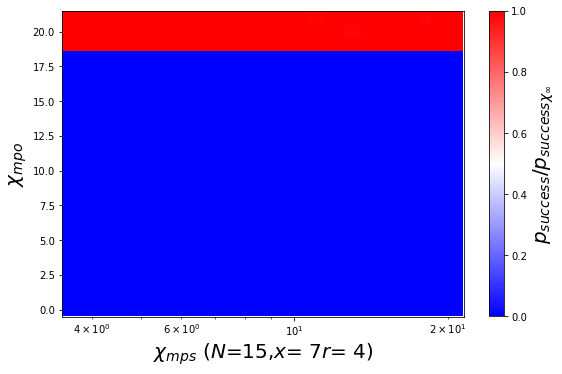

In [161]:
fig, ax = plt.subplots(figsize=figsize)
extent = [np.min(xi_mps) - 0.5, np.max(xi_mps) + 0.5, np.min(xi_mpo) - 0.5 - ez, np.max(xi_mpo) + 0.5]
im = ax.imshow(p_success_mpo_extra_zeros, extent=extent, interpolation='none', origin="lower", cmap="bwr", vmin=0, vmax=1, aspect='auto')

colorbar = fig.colorbar(im, ax=ax)
colorbar.set_label("$p_{success}/p_{success\chi_\infty}$", fontsize=20)
ax.set_xlabel("$\chi_{mps}$ ($N$="+str(N)+",$x$= "+str(x)+"$r$= "+str(order) +")", fontsize=20)
ax.set_ylabel("$\chi_{mpo}$", fontsize=20)
ax.set_xscale("log")
plt.savefig("pictures/xi_analysis_N_"+str(N)+"_x_"+str(x)+".pdf")

plt.show()
